<h2>Import thư viện

In [1]:
# Thư viện đọc file và chuyển kiểu
import pandas as pd
import numpy as np

# Đổi kiểu dữ liệu datetime
import datetime as dt

# Import các thư viện train
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import sklearn để tính toán các giá trị cũng như scaled dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

# Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Đọc dữ liệu

In [2]:
# Đọc dữ liệu từ file csv
df = pd.read_csv('./dataset/INTC.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,45.959999,47.470001,45.770000,47.080002,41.343922,18774600
1,2019-01-03,46.150002,46.279999,44.389999,44.490002,39.069489,32267300
2,2019-01-04,45.840000,47.570000,45.540001,47.220001,41.466866,35447300
3,2019-01-07,47.099998,48.000000,46.750000,47.439999,41.660061,22736800
4,2019-01-08,47.799999,48.029999,46.779999,47.740002,41.923508,22749200
5,2019-01-09,47.959999,48.570000,47.779999,48.009998,42.160610,22554500
6,2019-01-10,47.750000,48.650002,47.410000,48.560001,42.643612,27202600
7,2019-01-11,48.099998,49.290001,48.049999,48.930000,42.968529,21751300
8,2019-01-14,48.459999,48.830002,48.299999,48.349998,42.459183,19193900
9,2019-01-15,48.709999,49.130001,48.439999,48.599998,42.678730,22480800


In [3]:
# Chuyển đổi cột thuộc tính 'Date' về dạng DateTime
df['Date'] = pd.to_datetime(df['Date'])

# Chọn thuộc tính 'Date' làm Index
df.set_index('Date', inplace=True)

In [4]:
# Xem các dòng dữ liệu vừa được thêm vào
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,45.959999,47.470001,45.770000,47.080002,41.343922,18774600
2019-01-03,46.150002,46.279999,44.389999,44.490002,39.069489,32267300
2019-01-04,45.840000,47.570000,45.540001,47.220001,41.466866,35447300
2019-01-07,47.099998,48.000000,46.750000,47.439999,41.660061,22736800
2019-01-08,47.799999,48.029999,46.779999,47.740002,41.923508,22749200
...,...,...,...,...,...,...
2023-05-26,27.440001,29.090000,27.100000,29.000000,29.000000,71910600
2023-05-30,29.700001,30.040001,29.000000,29.990000,29.990000,54874800
2023-05-31,29.700001,32.290001,29.670000,31.440001,31.440001,136243800


<h2> Mô tả tập dữ liệu

In [5]:
# Các độ đo về các thuộc tính của tập dữ liệu
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03
mean,48.209937,48.817691,47.618068,48.219308,44.644661,3.167721e+07
std,10.821657,10.914132,10.725243,10.823570,9.228208,1.654258e+07
min,24.730000,25.120001,24.590000,24.900000,24.309349,6.313200e+06
25%,44.299999,44.900002,43.770000,44.419998,40.716064,2.077590e+07
50%,50.250000,51.000000,49.730000,50.369999,46.146706,2.832090e+07
75%,56.130001,56.560001,55.570000,56.000000,51.681534,3.740790e+07
max,68.199997,69.290001,67.309998,68.470001,63.348766,1.822699e+08


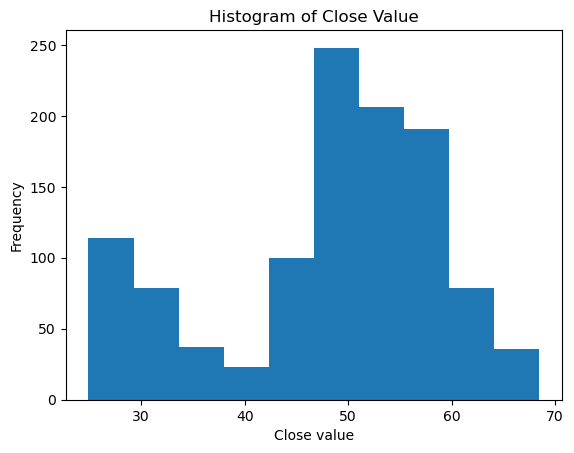

In [6]:
# Vẽ biểu đồ Histogram
plt.hist(df['Close'])

# Thiết lập label và title
plt.xlabel('Close value')
plt.ylabel('Frequency')
plt.title('Histogram of Close Value')

# Hiển thị biểu đồ histogram
plt.show()

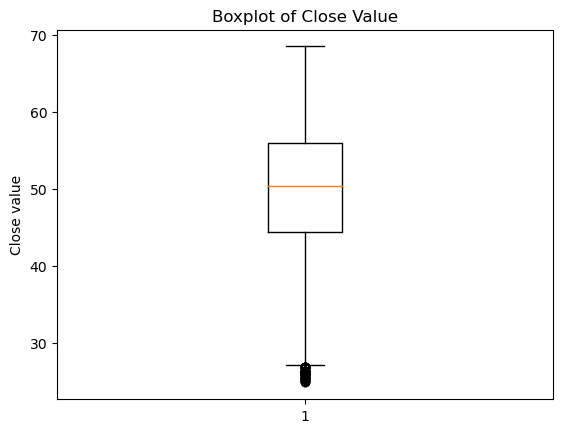

In [7]:
# Vẽ biểu đồ boxplot
plt.boxplot(df.Close)

# Thiết lập label và title
plt.title("Boxplot of Close Value")
plt.ylabel("Close value")

# Hiển thị biểu đồ box plot
plt.show()

<h2> Scale dữ liệu và phân chia các tập dữ liệu train, validation và test

In [8]:
#Lấy cột thuộc tính 'Close'
data = df['Close'].values

In [9]:
# Scale dữ liệu
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

In [10]:
# Chia dữ liệu thành tập train, validation và test theo tỉ lệ 7:2:1
train_size = int(len(data_scaled) * 0.7)
val_size = int(len(data_scaled) * 0.2)
test_size = len(data_scaled) - train_size - val_size

train_data = data_scaled[0 : train_size, :]
val_data = data_scaled[train_size : train_size + val_size, :]
test_data = data_scaled[train_size + val_size : len(data_scaled), :]

In [11]:
sequence_length = 30 #sử dụng 30 ngày trước đó để dự đoán ngày tiếp theo 

def add_data(data, sequence_length):
    X, Y = [], []
    for i in range(len(data) - sequence_length - 1):
        X.append(data[i : (i + sequence_length), :])
        Y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(Y)

# Thêm dữ liệu cho tập train, validation và test
X_train, y_train = add_data(train_data, sequence_length)
X_test, y_test = add_data(test_data, sequence_length)
X_val, y_val = add_data(val_data, sequence_length)

<h2>Xây dựng mô hình


In [12]:
model = Sequential() #Đóng gói trình tự của các layer bên trong

#4 lớp LSTM
#Dropout: tránh việc nhớ quá nhiều thông tin => vô hiệu hóa một phần dữ liệu trước đó
model.add(LSTM(units = 50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#1 lớp Dense (dày đặc)
model.add(Dense(units=1)) #1: 1 đơn vị cung cấp giá trị dự đoán

#Tối ưu hóa mô hình bằng adam
model.compile(optimizer = 'adam',loss='mean_squared_error')

<h2>Huấn luyện mô hình

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=2)

Epoch 1/50
24/24 - 14s - loss: 0.0659 - val_loss: 0.0394 - 14s/epoch - 570ms/step
Epoch 2/50
24/24 - 2s - loss: 0.0146 - val_loss: 0.0332 - 2s/epoch - 63ms/step
Epoch 3/50
24/24 - 2s - loss: 0.0126 - val_loss: 0.0213 - 2s/epoch - 64ms/step
Epoch 4/50
24/24 - 2s - loss: 0.0118 - val_loss: 0.0201 - 2s/epoch - 76ms/step
Epoch 5/50
24/24 - 2s - loss: 0.0112 - val_loss: 0.0169 - 2s/epoch - 82ms/step
Epoch 6/50
24/24 - 2s - loss: 0.0103 - val_loss: 0.0125 - 2s/epoch - 82ms/step
Epoch 7/50
24/24 - 2s - loss: 0.0105 - val_loss: 0.0189 - 2s/epoch - 84ms/step
Epoch 8/50
24/24 - 2s - loss: 0.0107 - val_loss: 0.0212 - 2s/epoch - 82ms/step
Epoch 9/50
24/24 - 2s - loss: 0.0103 - val_loss: 0.0170 - 2s/epoch - 81ms/step
Epoch 10/50
24/24 - 2s - loss: 0.0086 - val_loss: 0.0158 - 2s/epoch - 81ms/step
Epoch 11/50
24/24 - 2s - loss: 0.0102 - val_loss: 0.0159 - 2s/epoch - 82ms/step
Epoch 12/50
24/24 - 2s - loss: 0.0096 - val_loss: 0.0159 - 2s/epoch - 82ms/step
Epoch 13/50
24/24 - 2s - loss: 0.0089 - val_lo

<h2>Dự đoán CLose Price trên tập test và validation

In [14]:
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

6/6 [==============================] - 0s 23ms/step


<h2>Tính độ lỗi của mô hình

In [15]:
# Độ lỗi trên tập test
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAE on Test set: ", test_mae)
print(f"MAPE on Test set: ", test_mape)
print(f"MSE on Test set: ", test_mse)
print(f"RMSE on Test set: ", test_rmse)
print(f"MSLE on Test set: ", test_msle)

MAE on Test set:  0.06449839221567542
MAPE on Test set:  7305368200486.396
MSE on Test set:  0.005215237348226929
RMSE on Test set:  0.07221660022617327
MSLE on Test set:  0.004194555988361395


In [16]:
# Độ lỗi trên tập validation
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_msle = mean_squared_log_error(y_val, y_pred_val)

print(f"MAE on Validation set: ", val_mae)
print(f"MAPE on Validation set: ", val_mape)
print(f"MSE on Validation set: ", val_mse)
print(f"RMSE on Validation set: ", val_rmse)
print(f"MSLE on Validation set: ", val_msle)

MAE on Validation set:  0.061088294318311955
MAPE on Validation set:  0.9306930970069683
MSE on Validation set:  0.004804254292468896
RMSE on Validation set:  0.06931272821400768
MSLE on Validation set:  0.003286732104508428


<h2>Dự đoán giá đóng cửa cho 30 ngày tiếp theo

In [17]:
# Lấy ngày cuối cùng từ vị trí hiện tại
last_date = df.index[-1]

# Thêm một ngày mới sau ngày cuối cùng
next_date = last_date + pd.DateOffset(days=1)

# Tạo danh sách các chỉ số bắt đầu từ ngày tiếp theo trong 30 ngày
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

# Dự đoán giá đóng cửa cho 30 ngày tiếp theo
last_sequence_days = data[-sequence_length:].reshape(1, -1, 1)
y_next_30_days = []

for i in range(30):
    # Dự đoán giá đóng cửa của ngày kế tiếp
    next_day_pred = model.predict(last_sequence_days)
    
    # Lưu giá trị dự đoán
    y_next_30_days.append(next_day_pred[0][0])
    
    # Cập nhật thông tin về ngày kế tiếp
    last_sequence_days = np.concatenate([last_sequence_days[:, 1:, :], next_day_pred.reshape(1, 1, 1)], axis=1)

1/1 [==============================] - 0s 24ms/step


In [18]:
# Hiển thị giá trị dự đoán
print(y_next_30_days)

[3.2112412, 3.1960363, 3.1754408, 3.1496909, 3.117604, 3.0778906, 3.0296912, 2.9728794, 2.9083288, 2.8375714, 2.7618387, 2.681391, 2.5949678, 2.499551, 2.3917878, 2.270663, 2.1401978, 2.0075736, 1.8794506, 1.7599227, 1.650604, 1.5502095, 1.4500673, 1.3316395, 1.1849937, 1.0282093, 0.88700837, 0.77253294, 0.68278164, 0.6075075]


In [19]:
# Chuyển hóa dữ liệu lại như cũ
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)
val_data = scaler.inverse_transform(val_data)

<h2>Trực quan hóa mô hình

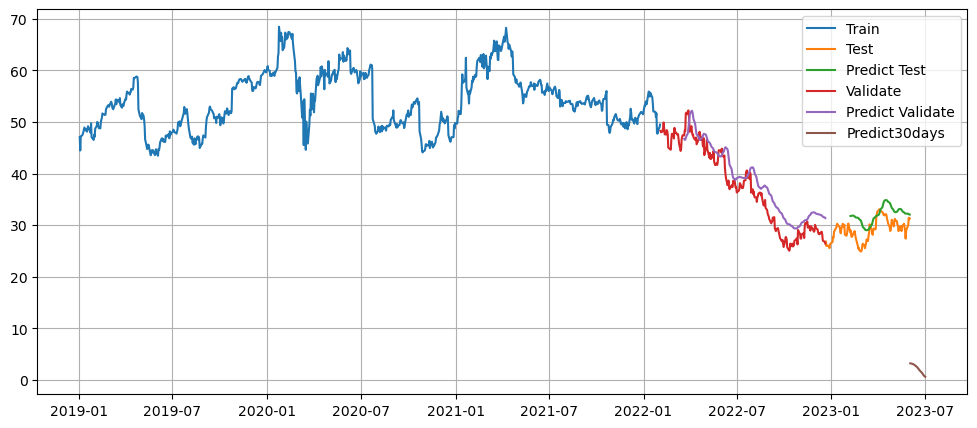

In [20]:
plt.figure(figsize=(12, 5))

# Tập train
plt.plot(df[:train_size].index, train_data)

# Tập test
plt.plot(df[train_size + val_size: ].index, test_data)

# Predict trên test
plt.plot(df[train_size + val_size + sequence_length + 1:].index, y_pred)

# Tập val
plt.plot(df[train_size : train_size + val_size].index, val_data)

# Predict trên tập Val
plt.plot(df[train_size + sequence_length + 1: train_size + val_size].index, y_pred_val)

# Dự đoán 30 ngày
plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'Predict Test','Validate',  'Predict Validate', 'Predict30days'])
plt.grid()
plt.savefig('IS403_RNN_INTC_721.png')
plt.show()